In [48]:
import os
import numpy as np
import pandas as pd
print(os.getcwd())

/home/jovyan/work/fsds/group_work


In [49]:
# loading data
df = pd.read_csv('/home/jovyan/work/fsds/group_work/data/airbnb/listings.csv', low_memory=False)

In [50]:
# select the column of 'host_id' to make a new dataframe called df1
df1 = df[['host_id']]
num_rows = len(df1)
print(num_rows)

87947


In [51]:
# to make a column called ones (I don't like to use groupby().count, as the if i groupby the 'host_id' then the other like 'name' 
# that i select from df will show the count of 'host_id' that could be ambiguous)
## 使用 np.ones 创建一个每个元素都是 1 的数组
ones_array = np.ones((num_rows, 1))

## 将数组转换为 DataFrame
df_ones = pd.DataFrame(ones_array, columns=['ones'])
df1.head(3)
## make every lines' value of 'one' to be int
df1['ones'] = df_ones['ones'].astype(int)
df1.head(19)

/tmp/ipykernel_253/705711811.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ones'] = df_ones['ones'].astype(int)


,host_id,ones
0,54730,1
1,60302,1
2,498201,1
3,67564,1
4,499704,1
5,497514,1
6,41759,1
7,502496,1
8,103583,1
9,503548,1


In [54]:
# convert the values in the 'one' column of each row to integers
grouped_df1 = df1.groupby('host_id').sum()
grouped_df1 = grouped_df1.reset_index().rename(columns={'ones': 'counts'})
grouped_df1.head(14)

,host_id,counts
0,4775,6
1,4879,1
2,6774,7
3,9323,1
4,9870,1
5,10657,3
6,10953,1
7,11431,1
8,13690,1
9,14596,3


In [72]:
# do K-means clustering analysis to find the proper value that could be used to filters out local landlords and companies

from sklearn.cluster import KMeans
the_count = grouped_df1[['counts']]  # 使用双括号保持 DataFrame 格式


k_pref = 3  # 您选择的簇的数量
kmeans = KMeans(n_clusters=k_pref, n_init=31, random_state=42)
kmeans.fit(the_count)

# join the cluter to the origin dataframe
grouped_df1['local_or_company'] = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


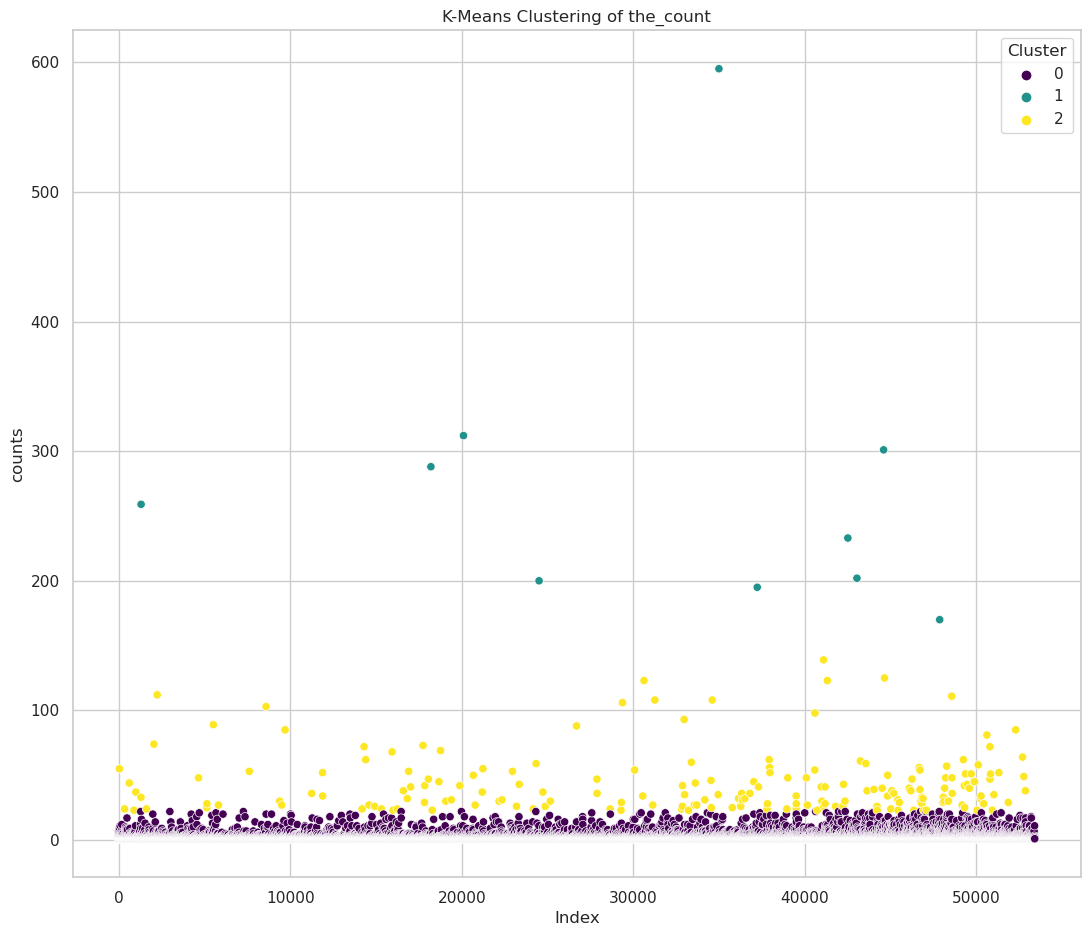

In [73]:
# plot the result of clustering
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(13, 11))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# 添加图表标题和标签
plt.title('K-Means Clustering of the_count')
plt.xlabel('Index')
plt.ylabel('counts')

# 显示图例和图表
plt.legend(title='Cluster')
plt.show()


In [74]:
# 假设 df 是您的 DataFrame
# 将 'local_or_company' 列中等于 0 的值替换为 1，其它值替换为 0
grouped_df1['local_or_company'] = np.where(grouped_df1['local_or_company'] == 0, 1, 0)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Max value in local hosts is: 22


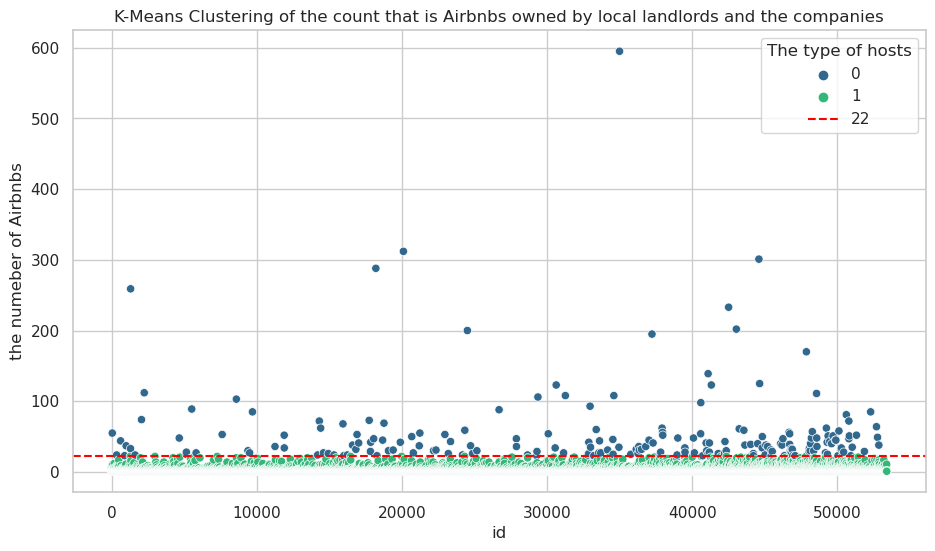

In [78]:
# plot again
## 设置绘图样式
sns.set(style="whitegrid")

## 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(11, 6))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

## 在df中选择出是本地房东的行，然后对筛选后的数据的'calculated_host_listings_count'列求最大值，这样可以算出本地房东拥有房子数量的最大值
## 首先，选择 'local_or_company' 列中值为 1 的行代表本地房东
filtered_rows = grouped_df1[grouped_df1['local_or_company'] == 1]

## 然后，在这些行中找到 'b' 列的最大值
max_value_in_local_hosts = filtered_rows['counts'].max()
print(f'Max value in local hosts is: {max_value_in_local_hosts}')

## 在 y=max_value_in_local_hosts 的位置添加一条红色虚线，并设置标签 max value of the numeber of Airbnbs owned by local landlords
plt.axhline(y=max_value_in_local_hosts, color='red', linestyle='--', label=max_value_in_local_hosts)

## 添加图表标题和标签
plt.title('K-Means Clustering of the count that is Airbnbs owned by local landlords and the companies')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs')

## 显示图例和图表
plt.legend(title='The type of hosts')
plt.show()

In [80]:
# 对原数据集df进行处理，选择'calculated_host_listings_count'列中小于等于max_value_in_local_hosts值作为新建'local_or_company'的1 (1的行代表本地房东，0代表公司)
df['local_or_company'] = np.where(df['calculated_host_listings_count'] <= max_value_in_local_hosts, 1, 0)
df.head(14)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN,1
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN,1
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN,1
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN,1
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN,1
5,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,46,4,180,2023-09-02,1.21,1,196,25,NaN,1
6,24328,Townhouse in London · ★4.90 · 1 bedroom · 1 be...,41759,Joe,NaN,Wandsworth,51.47072,-0.16266,Entire home/apt,250,2,96,2022-07-19,0.62,1,0,0,NaN,1
7,93783,Rental unit in London · ★4.73 · 2 bedrooms · 3...,502496,Darshi Rowan And Tara,NaN,Westminster,51.51881,-0.19650,Entire home/apt,371,5,24,2023-05-29,0.16,1,266,3,NaN,1
8,25123,Home in Barnet · ★4.78 · 1 bedroom · 1 bed · 1...,103583,Grace,NaN,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.79,3,0,0,NaN,1
9,94138,Rental unit in Poplar · ★4.85 · 1 bedroom · 1 ...,503548,Carl,NaN,Tower Hamlets,51.52764,-0.05293,Entire home/apt,75,2,42,2020-03-05,0.64,1,0,0,NaN,1


In [81]:
# df 是 DataFrame，将 DataFrame 导出到当前工作目录的 CSV 文件
df.to_csv('listings_v1.csv', index=False)